In [16]:
import pandas as pd
import numpy as np



In [17]:
df = pd.read_csv('wordcloud.csv')
df.head()

,Id,Review,Label
0,0,good and interesting,5.0
1,1,"This class is very helpful to me. Currently, I...",5.0
2,2,like!Prof and TAs are helpful and the discussi...,5.0
3,3,Easy to follow and includes a lot basic and im...,5.0
4,4,Really nice teacher!I could got the point eazl...,4.0


In [18]:
X = df2['Review']
y = df2['Label']

In [21]:
X.isnull().values.any()

False

In [22]:
df1=df.copy()

In [23]:
df2 = df[pd.notnull(df['Review'])]

In [24]:
df2['Review'] = df2['Review'].str.replace("[^a-zA-Z#]", " ")

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df2['Review'] = df2['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
tokenized_review = df2['Review'].apply(lambda x: x.split())
tokenized_review.head()

0                                  [good, interesting]
1    [This, class, very, helpful, Currently, still,...
2    [like, Prof, helpful, discussion, among, stude...
3    [Easy, follow, includes, basic, important, tec...
4        [Really, nice, teacher, could, point, eazliy]
Name: Review, dtype: object

In [32]:
sent_str = ""
for sentence in tokenized_review:
  print(sentence)
  #for i in sentence:
    #sent_str += str(i) + "-"
    #sent_str = sent_str[:-1]
    #print (sent_str[5:6])

['good', 'interesting']
['This', 'class', 'very', 'helpful', 'Currently', 'still', 'learning', 'this', 'class', 'which', 'makes', 'basic', 'music', 'knowledge']
['like', 'Prof', 'helpful', 'discussion', 'among', 'students', 'quite', 'active', 'Very', 'rewarding', 'learning', 'experience']
['Easy', 'follow', 'includes', 'basic', 'important', 'techniques', 'sketchup']
['Really', 'nice', 'teacher', 'could', 'point', 'eazliy']
['Great', 'course', 'recommend', 'especially', 'Business', 'Managers']
['most', 'useful', 'course', 'Management']
['disappointed', 'because', 'name', 'misleading', 'course', 'provides', 'good', 'introduction', 'overview', 'responsibilities', 'very', 'little', 'specifically', 'digital', 'content', 'deals', 'with', 'speed', 'single', 'short', 'lecture', 'course', 'treatment', 'superficial', 'easy', 'find', 'more', 'depth', 'material', 'freely', 'available', 'McKinsey', 'website', 'example']
['Super', 'content', 'definitely', 'course']
['excellent', 'courses', 'Coursera

In [34]:
blob=(' '.join([str(k) for k in df2['Review']]))
print(blob)

good interesting This class very helpful Currently still learning this class which makes basic music knowledge like Prof helpful discussion among students quite active Very rewarding learning experience Easy follow includes basic important techniques sketchup Really nice teacher could point eazliy Great course recommend especially Business Managers most useful course Management disappointed because name misleading course provides good introduction overview responsibilities very little specifically digital content deals with speed single short lecture course treatment superficial easy find more depth material freely available McKinsey website example Super content definitely course excellent courses Coursera information technology bosses managers there reason should apply course content pretty unique includes high level analysis wide range knowledge needed cover detailed aspects Best regards Oleg Serov Excellent course teachers Congratulations This good course technical company Good con

In [36]:
tagged_sentence = nltk.tag.pos_tag(blob.split())
edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
bn=(' '.join(edited_sentence))

In [38]:
bn=bn.lower()

In [40]:
from collections import Counter 
split_it = bn.split() 
Counter = Counter(split_it)
most_occur = Counter.most_common(70) 
print(most_occur)

[('course', 415), ('this', 229), ('very', 185), ('that', 132), ('with', 126), ('good', 100), ('really', 86), ('have', 83), ('printing', 79), ('great', 78), ('more', 77), ('some', 64), ('like', 54), ('will', 51), ('from', 50), ('interesting', 48), ('would', 47), ('about', 46), ('accounting', 45), ('introduction', 43), ('much', 42), ('understand', 41), ('easy', 39), ('week', 39), ('videos', 39), ('well', 38), ('time', 38), ('students', 37), ('there', 37), ('what', 37), ('knowledge', 36), ('information', 36), ('were', 35), ('your', 34), ('which', 33), ('learn', 33), ('excellent', 32), ('courses', 31), ('just', 31), ('class', 30), ('content', 30), ('learned', 30), ('only', 30), ('financial', 30), ('useful', 29), ('examples', 29), ('work', 28), ('learning', 27), ('people', 27), ('think', 27), ('they', 27), ('first', 26), ('clear', 26), ('start', 25), ('need', 25), ('material', 24), ('recommend', 23), ('make', 23), ('weeks', 23), ('music', 22), ('been', 22), ('enjoyed', 22), ('into', 22), ('

In [43]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['this','would','have','with','been','could','rather','that','will','from','accounting','about','week',
               'weeks','your','which','just','into']
stopwords.extend(newStopWords)

In [44]:
word_tokens = word_tokenize(bn) 

In [48]:
filtered_sentence = [w for w in word_tokens if not w in stopwords] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stopwords: 
        filtered_sentence.append(w) 
  
#print(word_tokens) 
print(filtered_sentence) 

['good', 'interesting', 'class', 'helpful', 'still', 'learning', 'class', 'makes', 'basic', 'music', 'knowledge', 'like', 'helpful', 'discussion', 'among', 'students', 'quite', 'active', 'rewarding', 'learning', 'experience', 'follow', 'includes', 'basic', 'important', 'techniques', 'sketchup', 'nice', 'teacher', 'point', 'eazliy', 'course', 'recommend', 'especially', 'useful', 'course', 'disappointed', 'name', 'misleading', 'course', 'provides', 'good', 'introduction', 'overview', 'responsibilities', 'little', 'specifically', 'digital', 'content', 'deals', 'speed', 'single', 'short', 'lecture', 'course', 'treatment', 'superficial', 'easy', 'find', 'depth', 'material', 'freely', 'available', 'website', 'example', 'content', 'definitely', 'course', 'excellent', 'courses', 'information', 'technology', 'bosses', 'managers', 'reason', 'apply', 'course', 'content', 'pretty', 'unique', 'includes', 'high', 'level', 'analysis', 'wide', 'range', 'knowledge', 'needed', 'cover', 'detailed', 'aspe

In [50]:
blob1=(' '.join([str(k) for k in filtered_sentence]))
print(blob1)

good interesting class helpful still learning class makes basic music knowledge like helpful discussion among students quite active rewarding learning experience follow includes basic important techniques sketchup nice teacher point eazliy course recommend especially useful course disappointed name misleading course provides good introduction overview responsibilities little specifically digital content deals speed single short lecture course treatment superficial easy find depth material freely available website example content definitely course excellent courses information technology bosses managers reason apply course content pretty unique includes high level analysis wide range knowledge needed cover detailed aspects best regards course teachers good course technical company content course setting least allow learn content long term missing reading material structured approach sharing demystifies evolving world typical global corporation introductory familiarizes participants nice

In [54]:
from wordcloud import WordCloud


In [62]:
kk=' '.join(df2['Review'])

In [67]:
rawText = kk.lower()

In [51]:
tokens = nltk.word_tokenize(blob1)
text = nltk.Text(tokens)

In [52]:
import re
from operator import itemgetter
 
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
finder = BigramCollocationFinder.from_words(text)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [53]:

scoredList = sorted(scored, key=itemgetter(1), reverse=True)
 

In [65]:
word_dict = {}
 
listLen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key. 
# Set the key to the scored value. 
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
#freq = nltk.FreqDist(word_dict)
 
#for key,val in freq.items():
 
    #print (str(key) + ':' + str(val))
#freq.plot(10, cumulative=False)



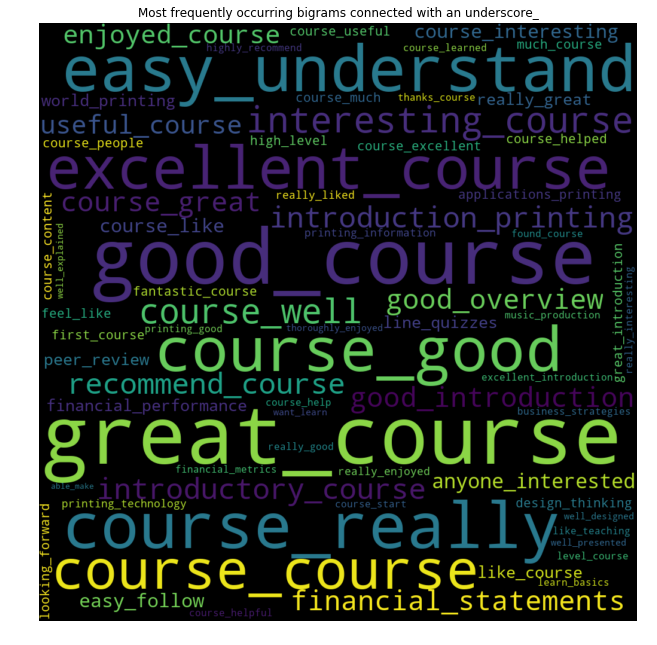

In [64]:
import matplotlib.pyplot as plt
WC_height = 1000
WC_width = 1000
WC_max_words = 70

wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,min_font_size=6)
 
wordCloud.generate_from_frequencies(word_dict)

plt.figure(figsize=(11,11),edgecolor='blue')
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
df2.ix[df2.Label>3,'Sentiment']="POSITIVE"
df2.ix[df2.Label<=3,'Sentiment']="NEGATIVE"

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

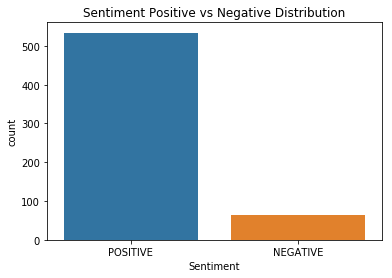

In [69]:
import seaborn as sns
ax = plt.axes()
sns.countplot(df2.Sentiment,ax=ax)
ax.set_title('Sentiment Positive vs Negative Distribution')
plt.show()

NameError: name 'data' is not defined

In [6]:
a=[1,2,3,4]

In [8]:
b=[1,3]

In [22]:
def finder(arr1,arr2):
    result=0
    for num in arr1+arr2:
        result^=num
    return result

In [20]:
def finder1(arr1,arr2):
    counter={}
    for num in arr2:
        if num in counter:
            counter[num]+=1
        else:
            counter[num]=1
    for num in arr1:
        if num in counter:
            counter[num]-=1
        else:
            counter[num]=1
    for k in counter:
        if counter[k]!=0:
            return k

In [23]:
finder([1,2,3,4,5,6],[3,6,5,4,2])

1

In [25]:
finder1([1,2,3,4,5,6],[3,6,5,4,1])

2

In [27]:
def unique_char(str):
    str.replace(' ','').lower()
    counter={}
    l=[]
    for i in str:
        if i in counter:
            counter[i]+=1
        else:
            counter[i]=1
    for k in counter:
        if counter[k]==1:
            l.append(k)
    return l

In [29]:
unique_char('dddddddddd')

[]